<a href="https://colab.research.google.com/github/vha22/bank-marketing/blob/main/Code_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Exploration des données**


In [ ]:
import pandas as pd
bank = pd.read_csv('bank.csv')
display(bank.head(10))
display(bank.duplicated())
display(bank.info())
display('nombre de valeurs manquantes : ',bank.isna().sum())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


0        False
1        False
2        False
3        False
4        False
         ...  
11157    False
11158    False
11159    False
11160    False
11161    False
Length: 11162, dtype: bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


None

'nombre de valeurs manquantes : '

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
print('Répartition de la variable deposit', bank['deposit'].value_counts())
print('Répartition en % par résultat de la dernière campagne',bank['poutcome'].value_counts()/len(bank))
print('Pourcentage du nombre de contact lors de la dernière campagne égal à 0', (bank['previous'] == 0).value_counts()/len(bank))


Répartition de la variable deposit deposit
no     5873
yes    5289
Name: count, dtype: int64
Répartition en % par résultat de la dernière campagne poutcome
unknown    0.745924
failure    0.110016
success    0.095951
other      0.048110
Name: count, dtype: float64
Pourcentage du nombre de contact lors de la dernière campagne égal à 0 previous
True     0.745744
False    0.254256
Name: count, dtype: float64


In [ ]:
#% de -1 dans pdays
print('% de -1 dans pdays : ',len(bank[bank['pdays'] == -1]) / len(bank) * 100)

# nombre de <0 balance
print('nombre de <0 balance : ',len(bank[bank['balance'] < 0]))

% de -1 dans pdays :  74.5744490234725
nombre de <0 balance :  688


**2. DataViz**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

Analyse de la distribution des variables

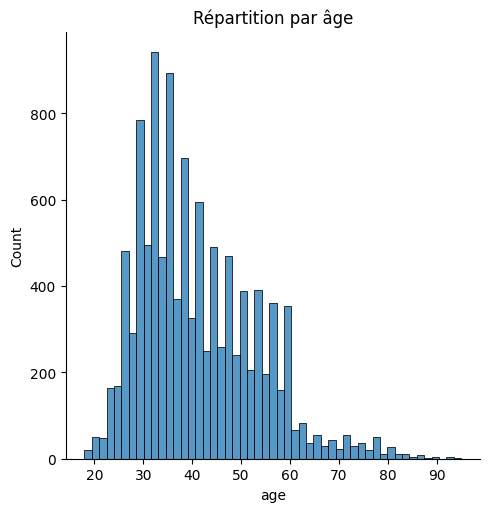

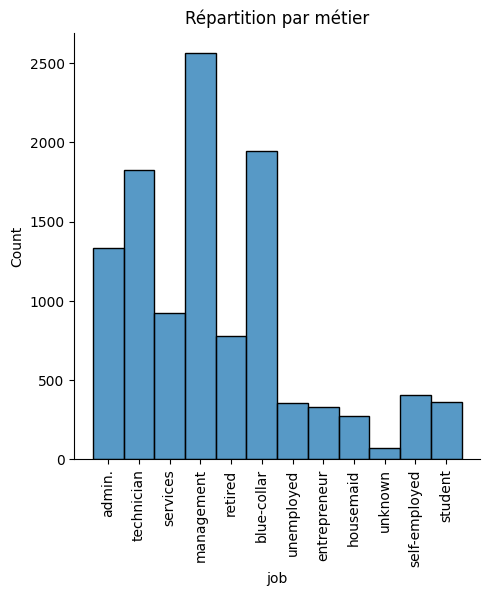

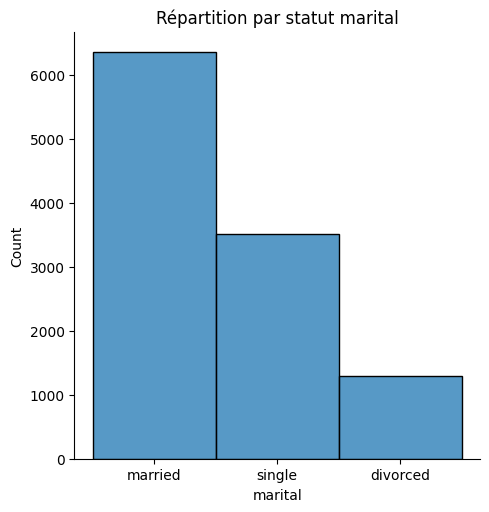

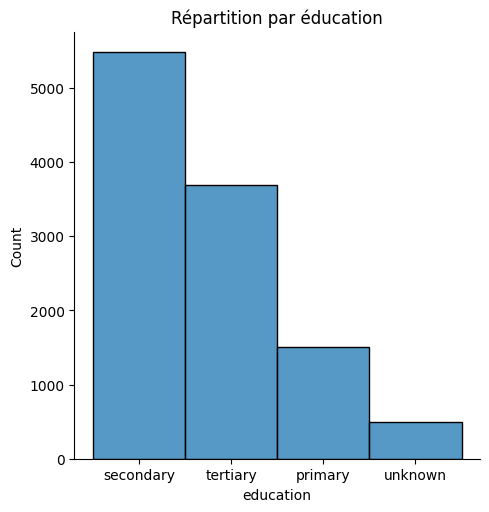

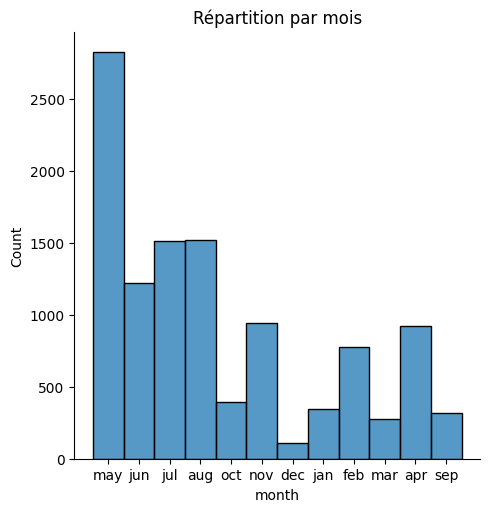

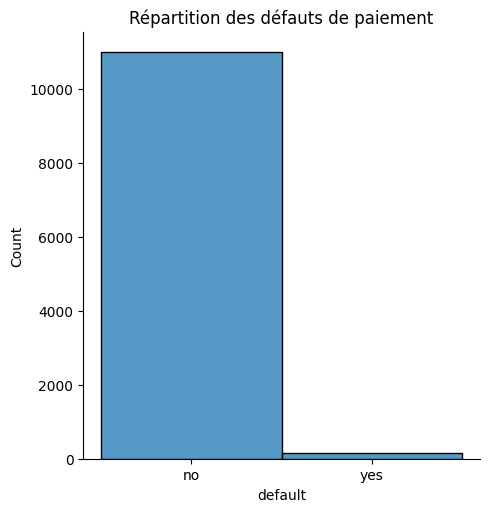

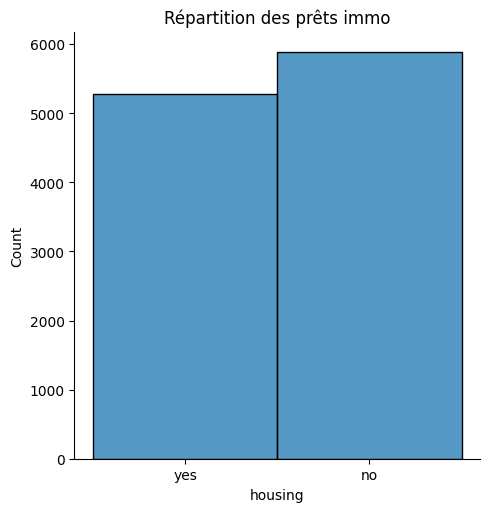

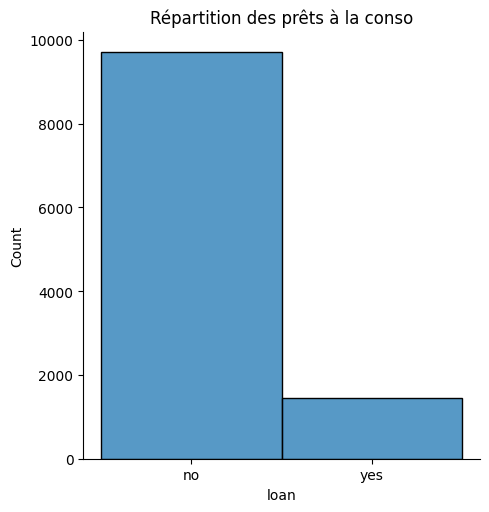

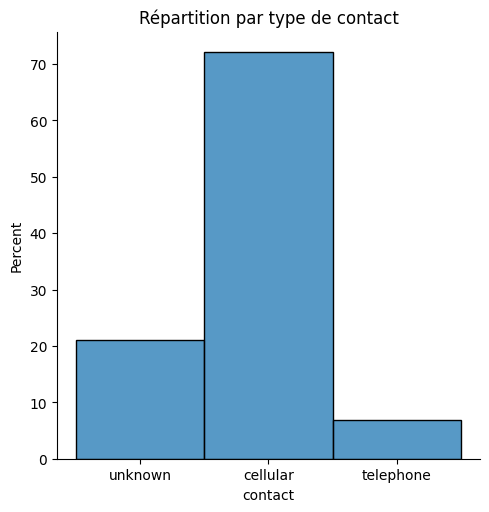

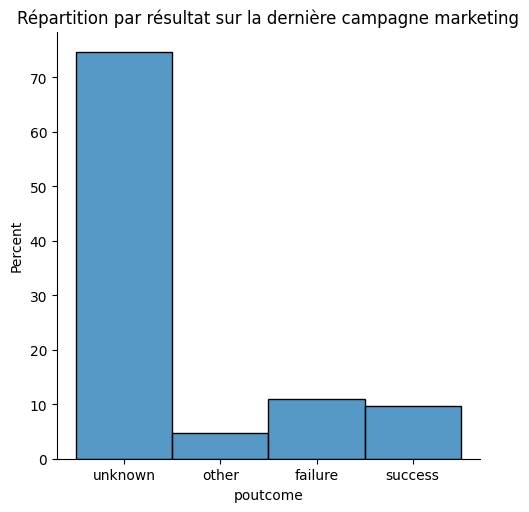

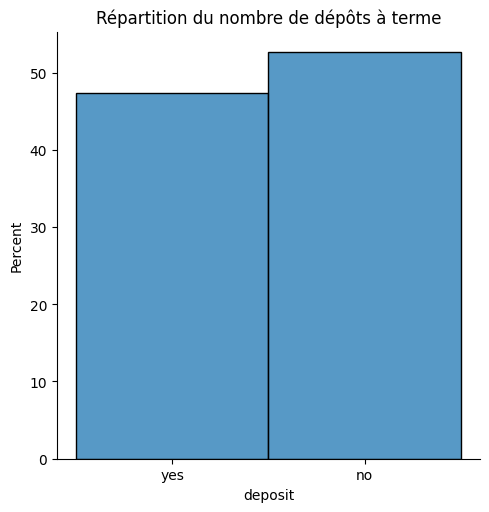

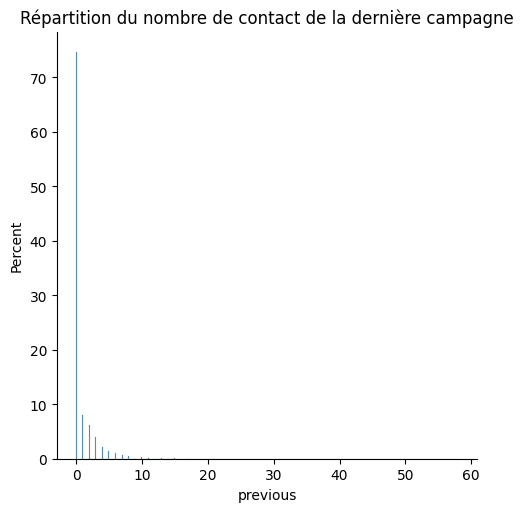

In [ ]:

sns.displot(x='age', data=bank)
plt.title('Répartition par âge')
sns.displot(x='job', data=bank)
plt.xticks(rotation=90)
plt.title('Répartition par métier')
sns.displot(x='marital', data=bank)
plt.title('Répartition par statut marital')
sns.displot(x='education', data=bank)
plt.title('Répartition par éducation')
sns.displot(x='month', data=bank)
plt.title('Répartition par mois')
sns.displot(x='default', data=bank)
plt.title('Répartition des défauts de paiement')
sns.displot(x='housing', data=bank)
plt.title('Répartition des prêts immo')
sns.displot(x='loan', data=bank)
plt.title('Répartition des prêts à la conso')
sns.displot(x='contact', data=bank, stat = 'percent')
plt.title('Répartition par type de contact')
sns.displot(x='poutcome', data=bank, stat = 'percent')
plt.title('Répartition par résultat sur la dernière campagne marketing')
sns.displot(x='deposit', data=bank, stat = 'percent')
plt.title('Répartition du nombre de dépôts à terme')
sns.displot(x='previous', data=bank, stat = 'percent')
plt.title('Répartition du nombre de contact de la dernière campagne');

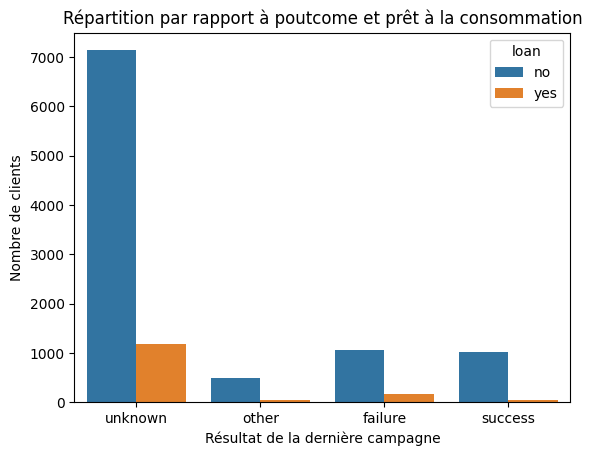

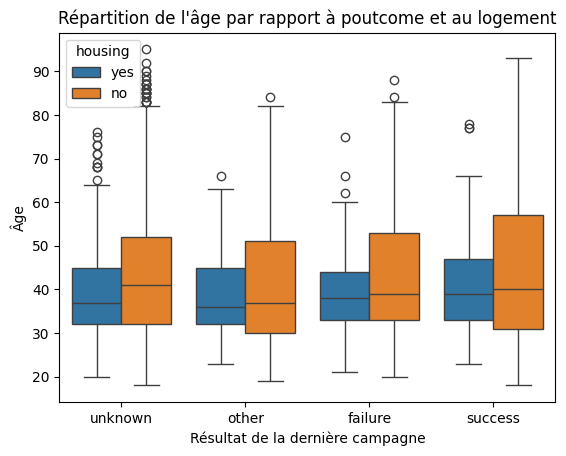

Text(0.5, 1.0, 'Relation entre l âge, le solde et le résultat de la dernière campagne sans Unknown')

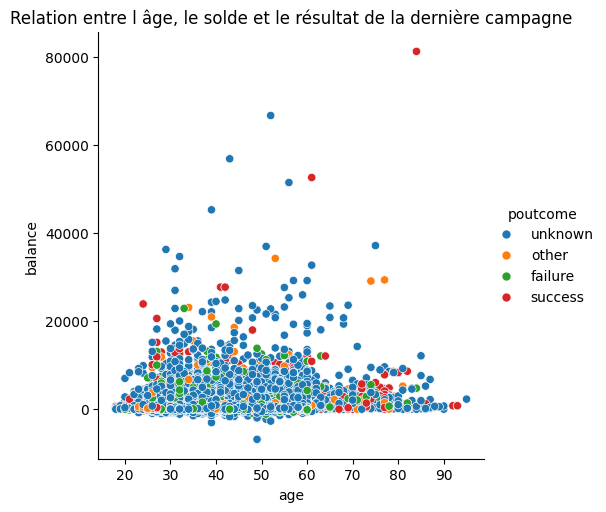

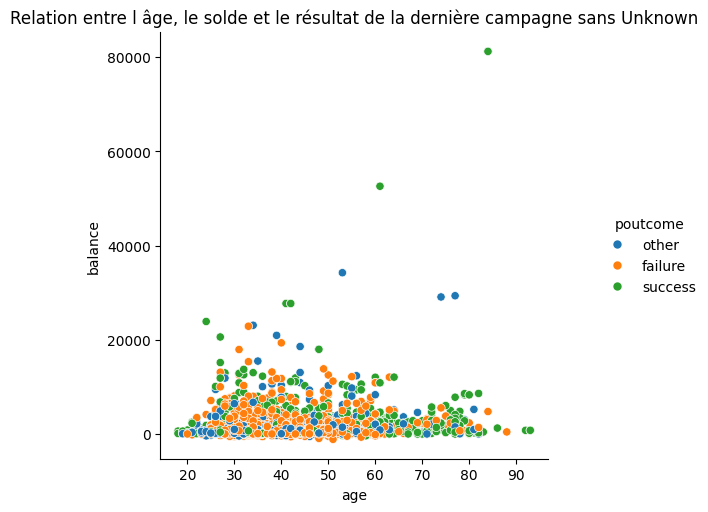

In [ ]:
#Graphique d'étude en fonction de Unknown que nous n'avons pas retenu pour la suite du projet
sns.countplot(x=bank['poutcome'],hue=bank['loan'])
plt.title('Répartition par rapport à poutcome et prêt à la consommation')
plt.xlabel('Résultat de la dernière campagne')
plt.ylabel('Nombre de clients')
plt.show()
sns.boxplot(x='poutcome',y='age',data=bank,hue='housing')
plt.title('Répartition de l\'âge par rapport à poutcome et au logement')
plt.xlabel('Résultat de la dernière campagne')
plt.ylabel('Âge')
plt.show()
sns.relplot(x='age',y="balance",data=bank,hue='poutcome')
plt.title('Relation entre l âge, le solde et le résultat de la dernière campagne')
bank_sans_unkown= bank[bank['poutcome'] != 'unknown']
g = sns.relplot(x='age', y='balance', data=bank_sans_unkown, hue='poutcome')
plt.title('Relation entre l âge, le solde et le résultat de la dernière campagne sans Unknown')




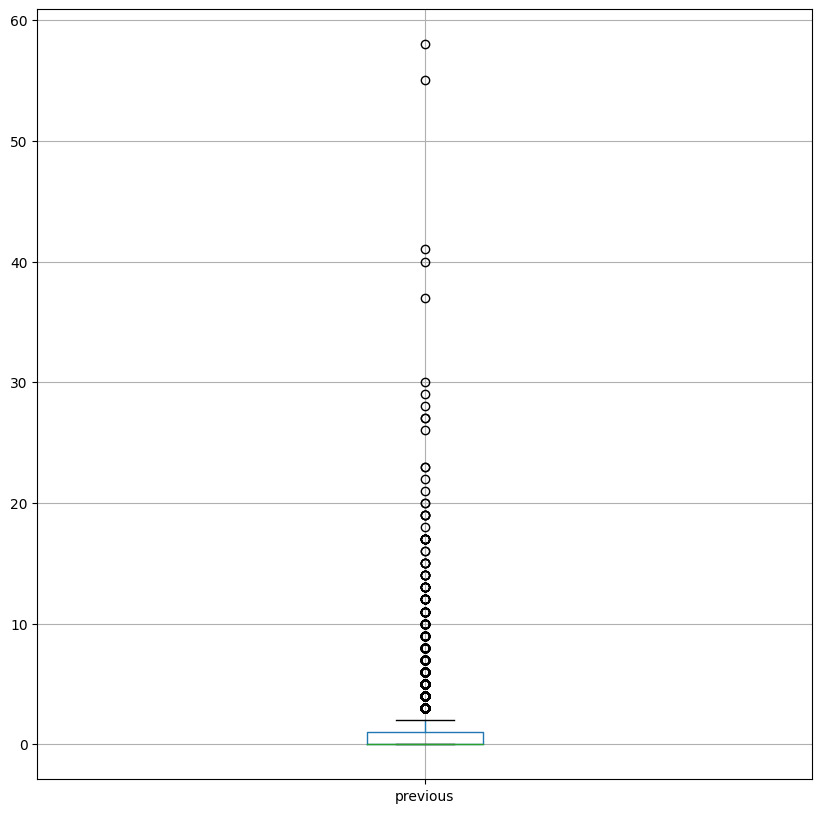

In [ ]:
bank.boxplot(column = ['previous'], figsize=(10,10));


Répartition des données en fonction de la variable cible

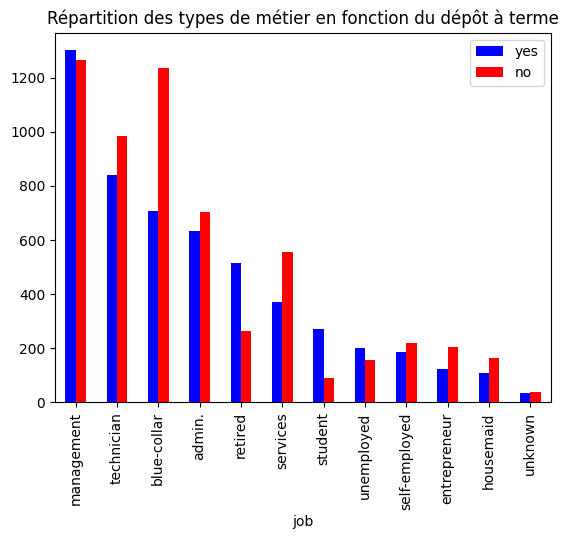

In [ ]:
b_df = pd.DataFrame()
b_df['yes'] = bank[bank['deposit'] == 'yes']['job'].value_counts()
b_df['no'] = bank[bank['deposit'] == 'no']['job'].value_counts()


b_df.plot.bar(title = 'Job & Deposit ', color=['b','r'])
plt.title('Répartition des types de métier en fonction du dépôt à terme');

In [ ]:
fig=px.scatter(bank,x='balance',y="age", color='deposit',title='Relation Age, Balance et deposit')
fig.show()

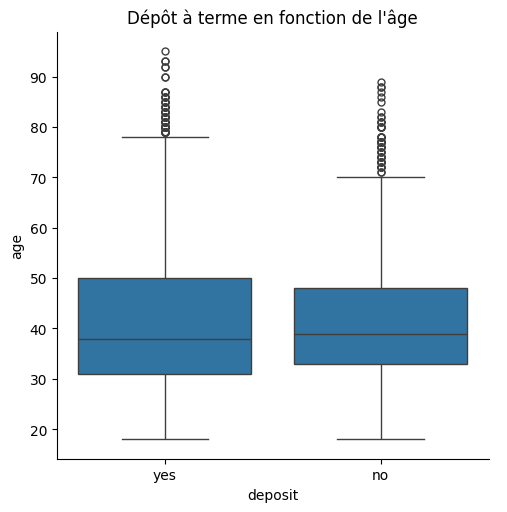

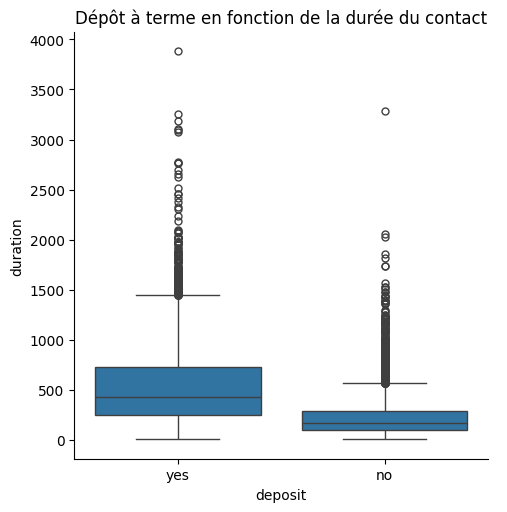

In [ ]:
sns.catplot(x='deposit', y='age', data=bank, kind = 'box')
plt.title("Dépôt à terme en fonction de l'âge")
sns.catplot(x='deposit', y='duration', data=bank, kind = 'box')
plt.title("Dépôt à terme en fonction de la durée du contact");

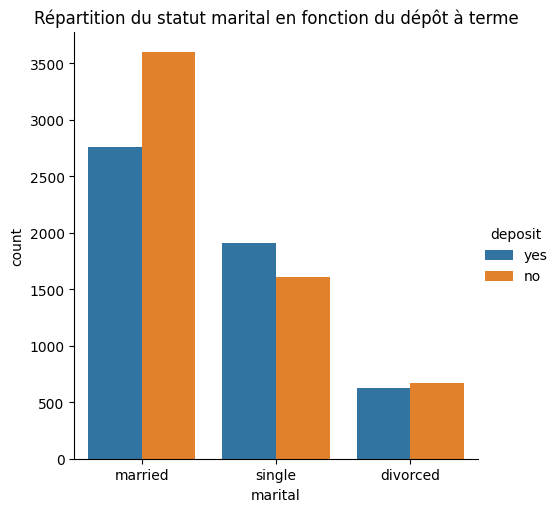

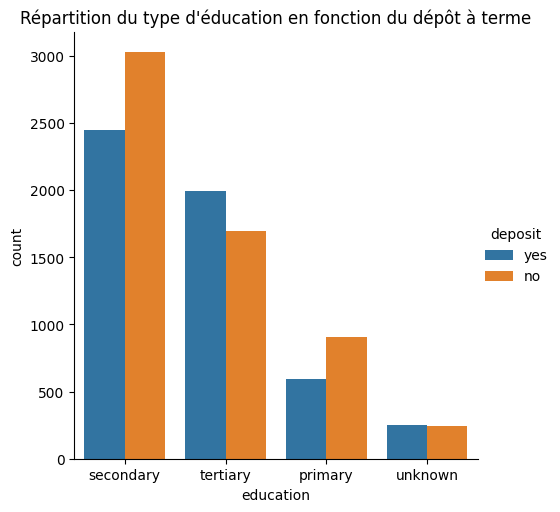

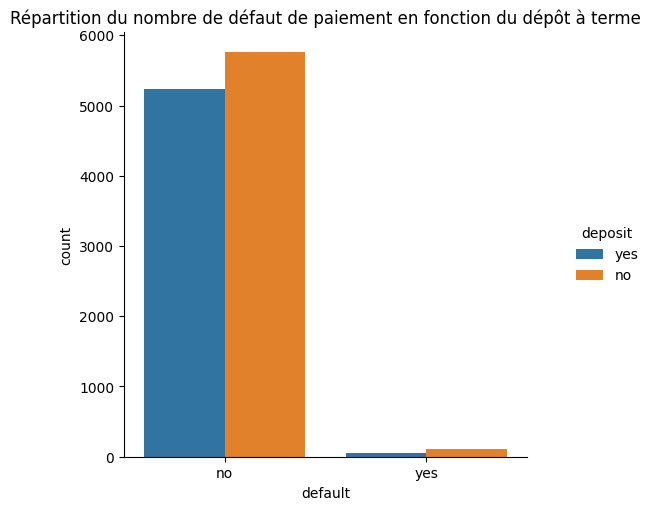

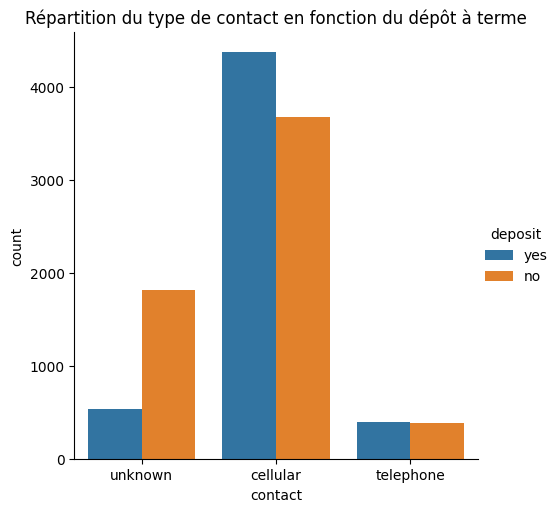

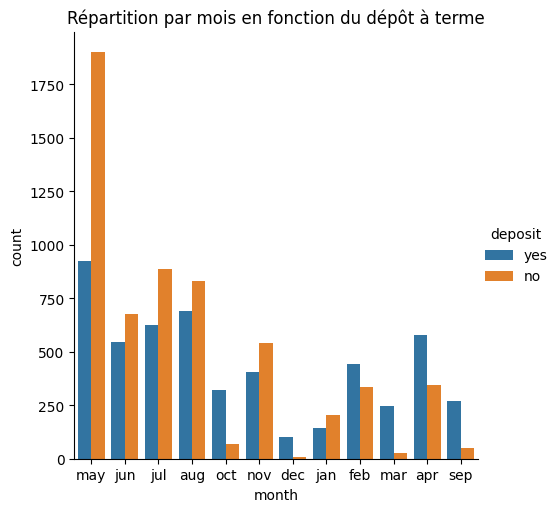

In [ ]:
sns.catplot(x='marital', kind='count', data=bank, hue = 'deposit')
plt.title("Répartition du statut marital en fonction du dépôt à terme")
sns.catplot(x='education', kind='count', data=bank, hue = 'deposit')
plt.title("Répartition du type d'éducation en fonction du dépôt à terme")
sns.catplot(x='default', kind='count', data=bank, hue = 'deposit')
plt.title("Répartition du nombre de défaut de paiement en fonction du dépôt à terme")
sns.catplot(x='contact', kind='count', data=bank, hue = 'deposit')
plt.title("Répartition du type de contact en fonction du dépôt à terme")
sns.catplot(x='month', kind='count', data=bank, hue = 'deposit')
plt.title("Répartition par mois en fonction du dépôt à terme");

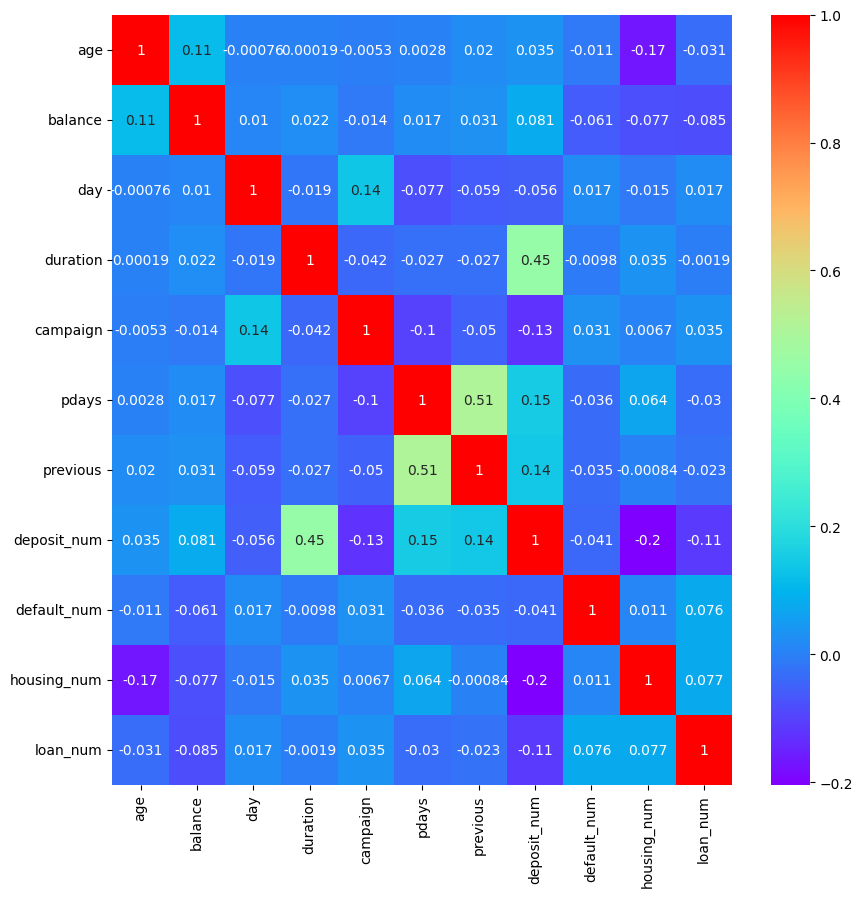

In [ ]:
#transformation en valeur numérique
deposit = lambda x:1 if x=='yes' else 0
bank['deposit_num'] = bank['deposit'].apply(deposit)

default = lambda x:1 if x=='yes' else 0
bank['default_num'] = bank['default'].apply(default)

housing = lambda x:1 if x=='yes' else 0
bank['housing_num'] = bank['housing'].apply(housing)

loan = lambda x:1 if x=='yes' else 0
bank['loan_num'] = bank['loan'].apply(loan)

matrice = bank.corr(numeric_only = callable )
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(matrice, annot=True, cmap = 'rainbow', ax = ax);

In [ ]:
bank.drop(['deposit_num', 'default_num', 'housing_num', 'loan_num'], axis = 1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
#hypothese :
#H0 = La variable deposit est indépendante du mois
#H1 = La variable deposit n'est pas indépendante du mois

ct=pd.crosstab(bank['deposit'], bank['month'])

from scipy.stats import chi2_contingency

resultats_chi2 = chi2_contingency(ct)

statistique = resultats_chi2[0]
p_valeur = resultats_chi2[1]

print(statistique, p_valeur)

# La variable deposit n'est pas dépendante du mois de contact

1046.7745027840656 1.6420829584486923e-217


**3. Pré-processing**

In [ ]:
#suppression des lignes avec les valeurs 'unknown' pour les colonnes 'Job' et 'education'

bank_cleaned = bank.drop(bank.loc[bank["job"] == "unknown"].index, inplace=True)
bank_cleaned = bank.drop(bank.loc[bank["education"] == "unknown"].index, inplace=True)

#suppression de la colonne 'contact' et 'pdays' car pas siginificative
bank_cleaned = bank.drop(['contact', 'pdays'], axis = 1)

print(bank_cleaned['job'].value_counts())
print(bank_cleaned['education'].value_counts())


print(bank_cleaned.value_counts().sum())



#transformation durée en minute (plus parlant)

bank_cleaned['duration'] = bank_cleaned['duration'] // 60

bank_cleaned.head()

job
management       2482
blue-collar      1858
technician       1771
admin.           1294
services          882
retired           731
self-employed     394
unemployed        350
entrepreneur      314
student           293
housemaid         265
Name: count, dtype: int64
education
secondary    5461
tertiary     3680
primary      1493
Name: count, dtype: int64
10634


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous,poutcome,deposit,deposit_num,default_num,housing_num,loan_num
0,59,admin.,married,secondary,no,2343,yes,no,5,may,17,1,0,unknown,yes,1,0,1,0
1,56,admin.,married,secondary,no,45,no,no,5,may,24,1,0,unknown,yes,1,0,0,0
2,41,technician,married,secondary,no,1270,yes,no,5,may,23,1,0,unknown,yes,1,0,1,0
3,55,services,married,secondary,no,2476,yes,no,5,may,9,1,0,unknown,yes,1,0,1,0
4,54,admin.,married,tertiary,no,184,no,no,5,may,11,2,0,unknown,yes,1,0,0,0


In [ ]:
#outliers - valeurs continue

#previous
print(bank_cleaned['previous'].describe())

#duration
print(bank_cleaned['duration'].describe())

#rien faire

count    10634.000000
mean         0.837784
std          2.317528
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         58.000000
Name: previous, dtype: float64
count    10634.000000
mean         5.730299
std          5.820059
min          0.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         64.000000
Name: duration, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

**4.** **Modélisation**

Classification car la variable cible prend des valeurs discrètes

In [ ]:
#séparation du jeu de donnée en deux DF

feats = bank_cleaned.drop(['deposit'], axis = 1)
target = bank_cleaned['deposit']


#séparation en deux jeux entrainement x test

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size = 0.2, random_state=42)

#standardiser les variables numériques

scaler = StandardScaler()
cols = ['age','balance','day','campaign','previous','duration']

X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

#encodage des modalités des variables explicatives
# 1. valeur booleen

def replace_yes_no(x):
  if x == 'no':
    return 0
  if x == 'yes':
    return 1

X_train['default'] = X_train['default'].apply(replace_yes_no)
X_test['default'] = X_test['default'].apply(replace_yes_no)

X_train['housing'] = X_train['housing'].apply(replace_yes_no)
X_test['housing'] = X_test['housing'].apply(replace_yes_no)

X_train['loan'] = X_train['loan'].apply(replace_yes_no)
X_test['loan'] = X_test['loan'].apply(replace_yes_no)

display(X_train)

# 2. les mois
def replace_month(x):
  if x == 'jan':
    return 1
  if x == 'feb':
    return 2
  if x == 'mar':
    return 3
  if x == 'apr':
    return 4
  if x == 'may':
    return 5
  if x == 'jun':
    return 6
  if x == 'jul':
    return 7
  if x == 'aug':
    return 8
  if x == 'sep':
    return 9
  if x == 'oct':
    return 10
  if x == 'nov':
    return 11
  if x == 'dec':
    return 12

X_train['month'] = X_train['month'].apply(replace_month)
X_test['month'] = X_test['month'].apply(replace_month)


display(X_train)

# 3. valeur chaine de caractère

X_train = pd.get_dummies(X_train, dtype = 'int')
X_test= pd.get_dummies(X_test, dtype = 'int')

display(X_train)


#encodage des modalités de la variable cible
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

print(list(X_test.columns))

display(y_train)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous,poutcome,deposit_num,default_num,housing_num,loan_num
9522,0.756560,technician,married,secondary,0,-0.434892,1,0,-1.500619,feb,-0.813735,0.543086,2.263619,failure,0,0,1,0
790,-0.596761,technician,married,tertiary,0,1.971566,1,0,-0.193953,aug,0.575895,0.543086,-0.362700,unknown,1,0,1,0
10688,-0.173848,blue-collar,married,secondary,0,-0.265474,1,0,-1.500619,feb,-0.813735,0.543086,1.388179,failure,0,0,1,0
6382,-1.104257,student,single,tertiary,0,-0.399065,1,0,-0.075166,may,-0.640031,-0.568033,-0.362700,unknown,0,0,1,0
9877,-0.258431,technician,single,tertiary,0,1.088955,1,0,0.518773,nov,0.054784,-0.568033,0.075020,failure,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6029,0.418230,technician,divorced,tertiary,0,-0.466164,1,0,-0.550317,aug,-0.292624,0.913459,-0.362700,unknown,0,0,1,0
5467,-0.935092,management,married,tertiary,0,-0.395422,1,0,-0.193953,may,0.054784,2.765325,-0.362700,unknown,0,0,1,0
5672,-0.681344,technician,single,tertiary,0,-0.084519,1,0,0.756349,jul,-0.813735,-0.568033,-0.362700,unknown,0,0,1,0
890,0.079900,admin.,single,secondary,0,-0.541157,1,1,0.637561,oct,0.402192,-0.568033,0.075020,other,1,0,1,1


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,previous,poutcome,deposit_num,default_num,housing_num,loan_num
9522,0.756560,technician,married,secondary,0,-0.434892,1,0,-1.500619,2,-0.813735,0.543086,2.263619,failure,0,0,1,0
790,-0.596761,technician,married,tertiary,0,1.971566,1,0,-0.193953,8,0.575895,0.543086,-0.362700,unknown,1,0,1,0
10688,-0.173848,blue-collar,married,secondary,0,-0.265474,1,0,-1.500619,2,-0.813735,0.543086,1.388179,failure,0,0,1,0
6382,-1.104257,student,single,tertiary,0,-0.399065,1,0,-0.075166,5,-0.640031,-0.568033,-0.362700,unknown,0,0,1,0
9877,-0.258431,technician,single,tertiary,0,1.088955,1,0,0.518773,11,0.054784,-0.568033,0.075020,failure,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6029,0.418230,technician,divorced,tertiary,0,-0.466164,1,0,-0.550317,8,-0.292624,0.913459,-0.362700,unknown,0,0,1,0
5467,-0.935092,management,married,tertiary,0,-0.395422,1,0,-0.193953,5,0.054784,2.765325,-0.362700,unknown,0,0,1,0
5672,-0.681344,technician,single,tertiary,0,-0.084519,1,0,0.756349,7,-0.813735,-0.568033,-0.362700,unknown,0,0,1,0
890,0.079900,admin.,single,secondary,0,-0.541157,1,1,0.637561,10,0.402192,-0.568033,0.075020,other,1,0,1,1


,age,default,balance,housing,loan,day,month,duration,campaign,previous,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
9522,0.756560,0,-0.434892,1,0,-1.500619,2,-0.813735,0.543086,2.263619,...,0,1,0,0,1,0,1,0,0,0
790,-0.596761,0,1.971566,1,0,-0.193953,8,0.575895,0.543086,-0.362700,...,0,1,0,0,0,1,0,0,0,1
10688,-0.173848,0,-0.265474,1,0,-1.500619,2,-0.813735,0.543086,1.388179,...,0,1,0,0,1,0,1,0,0,0
6382,-1.104257,0,-0.399065,1,0,-0.075166,5,-0.640031,-0.568033,-0.362700,...,0,0,1,0,0,1,0,0,0,1
9877,-0.258431,0,1.088955,1,0,0.518773,11,0.054784,-0.568033,0.075020,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6029,0.418230,0,-0.466164,1,0,-0.550317,8,-0.292624,0.913459,-0.362700,...,1,0,0,0,0,1,0,0,0,1
5467,-0.935092,0,-0.395422,1,0,-0.193953,5,0.054784,2.765325,-0.362700,...,0,1,0,0,0,1,0,0,0,1
5672,-0.681344,0,-0.084519,1,0,0.756349,7,-0.813735,-0.568033,-0.362700,...,0,0,1,0,0,1,0,0,0,1
890,0.079900,0,-0.541157,1,1,0.637561,10,0.402192,-0.568033,0.075020,...,0,0,1,0,1,0,0,1,0,0


['age', 'default', 'balance', 'housing', 'loan', 'day', 'month', 'duration', 'campaign', 'previous', 'deposit_num', 'default_num', 'housing_num', 'loan_num', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']


array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
# Random Forest
# Le modèle RandomForestClassifier est plus puissant mais requiert + de fine-tuning pour en extraire les meilleures
# performances possibles. C'est un modèle robuste aux outliers et vu la taille de notre dataset, ce ne sera pas un modèle
# très long à évaluer.

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

print('Accuracy score du Random Forest (train) : ',forest.score(X_train, y_train))
print('Accuracy score du Random Forest (test) : ',forest.score(X_test, y_test))


#Logistic Regression
# La régression Logistique servira de baseline. C'est un modèle très rapide à entraîner et évaluer. Cepandant notre dataset
# contient pas mal d'outliers, l'entraînement de ce modèle sera peut être un peu perturbé

from sklearn.linear_model import LogisticRegression

reglog = LogisticRegression(random_state=42)
reglog.fit(X_train, y_train)

print('Accuracy score du Logistic regression (train) : ',reglog.score(X_train, y_train))
print('Accuracy score du Logistic regression (test) : ',reglog.score(X_test, y_test))

# Arbre de décision
# Le modèle Decision Tree est également très rapide à entraîner. Les modèles de type arbre sont robustes aux outliers dans
# les variables explicatives, donc cet arbre de décision servira de baseline pour cette famille de modèles.abs

from sklearn.tree import DecisionTreeClassifier

treecl = DecisionTreeClassifier(random_state=42)
treecl.fit(X_train,y_train)

print('Accuracy score du Decision Tree (train) : ',treecl.score(X_train, y_train))
print('Accuracy score du Decision Tree (test) : ',treecl.score(X_test, y_test))




Accuracy score du Random Forest (train) :  1.0
Accuracy score du Random Forest (test) :  1.0
Accuracy score du Logistic regression (train) :  1.0
Accuracy score du Logistic regression (test) :  0.999529854254819
Accuracy score du Decision Tree (train) :  1.0
Accuracy score du Decision Tree (test) :  1.0


In [ ]:
from sklearn.metrics import classification_report

y_pred_test_forest = forest.predict(X_test)
display(pd.crosstab(y_pred_test_forest, y_test, colnames =  ['Real classes'], rownames = ['Predicted classes']))

print(classification_report(y_test, y_pred_test_forest))

y_pred_test_reglog = reglog.predict(X_test)
display(pd.crosstab(y_pred_test_reglog, y_test, colnames =  ['Real classes'], rownames = ['Predicted classes']))

print(classification_report(y_test, y_pred_test_reglog))

y_pred_test_treecl = treecl.predict(X_test)
display(pd.crosstab(y_pred_test_treecl, y_test, colnames =  ['Real classes'], rownames = ['Predicted classes']))

print(classification_report(y_test, y_pred_test_treecl))



Real classes,0,1
Predicted classes,,
0,1147,0
1,0,980


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1147
           1       1.00      1.00      1.00       980

    accuracy                           1.00      2127
   macro avg       1.00      1.00      1.00      2127
weighted avg       1.00      1.00      1.00      2127



Real classes,0,1
Predicted classes,,
0,1146,0
1,1,980


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1147
           1       1.00      1.00      1.00       980

    accuracy                           1.00      2127
   macro avg       1.00      1.00      1.00      2127
weighted avg       1.00      1.00      1.00      2127



Real classes,0,1
Predicted classes,,
0,1147,0
1,0,980


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1147
           1       1.00      1.00      1.00       980

    accuracy                           1.00      2127
   macro avg       1.00      1.00      1.00      2127
weighted avg       1.00      1.00      1.00      2127



In [ ]:
# Modèle AdaBoostClassifier

from sklearn.ensemble import AdaBoostClassifier
# Création du classifier et construction du modèle sur les données d'entraînement
ac = AdaBoostClassifier(estimator=forest, n_estimators=400)
ac.fit(X_train, y_train)

# Calcul de l'accuracy
print(ac.score(X_test, y_test))
print(ac.score(X_train, y_train))

1.0
1.0


In [ ]:
# Modèle Bagging

# Création du classifier et construction du modèle sur les données d'entraînement
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier(n_estimators=1000, oob_score=True)
bc.fit(X_train, y_train)
bc.oob_score_

print(bc.score(X_test, y_test))
print(bc.score(X_train, y_train))

1.0
1.0


In [ ]:
# Validation croisée pour chosir le meilleur hyperparamètre max_depth pour le random forest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_range = {'max_depth':np.arange(1, 11, 1), 'n_estimators': [10, 50, 100, 250, 500, 1000]}
rf_test = RandomForestClassifier()
CV_rfc = GridSearchCV(estimator=rf_test, param_grid=param_range, scoring='accuracy', cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'n_estimators': [10, 50, 100, 250, 500, 1000]},
             scoring='accuracy')

In [ ]:
# Meilleur hyperparamètre
CV_rfc.best_params_

{'max_depth': 4, 'n_estimators': 250}

In [ ]:
rf2 = RandomForestClassifier(max_depth = 10)
rf2.fit(X_train, y_train)

print('Score sur ensemble train', rf2.score(X_train, y_train))
print('Score sur ensemble test', rf2.score(X_test, y_test))

Score sur ensemble train 1.0
Score sur ensemble test 1.0


<Axes: >

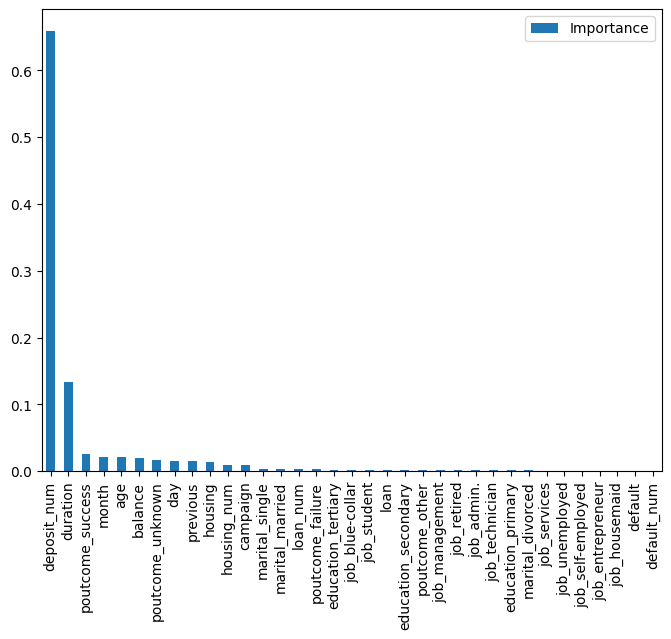

In [ ]:
# afficher les features importantes

import matplotlib.pyplot as plt

%matplotlib inline

feat_importances = pd.DataFrame(forest.feature_importances_, index=X_test.columns, columns =['Importance'] )
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)

feat_importances.plot(kind='bar', figsize=(8,6))

#Les colonnes les plus importantes sont donc duration, balance, age, day, month

In [ ]:
#réentrainer le modèle en gardant les 5 variables les plus importantes

X_train_new = X_train[['duration','balance', 'age', 'day', 'month']]
X_test_new = X_test[['duration','balance', 'age', 'day', 'month']]

forest = RandomForestClassifier(random_state=42, max_depth = 10)
forest.fit(X_train_new, y_train)

print('Accuracy score du Random Forest (train) : ',forest.score(X_train_new, y_train))
print('Accuracy score du Random Forest (test) : ',forest.score(X_test_new, y_test))

# le fait de ne garder que 5 variables a fait baisser notre score.

Accuracy score du Random Forest (train) :  0.8746914305865757
Accuracy score du Random Forest (test) :  0.8171133051245886


In [ ]:
#réentrainer le modèle en gardant les 9 variables les plus importantes

X_train_new = X_train[['duration', 'balance', 'age', 'day', 'month', 'campaign', 'poutcome_success','housing','previous']]
X_test_new = X_test[['duration', 'balance', 'age', 'day', 'month', 'campaign', 'poutcome_success','housing','previous']]

forest = RandomForestClassifier(random_state = 42, max_depth = 10)
forest.fit(X_train_new, y_train)

print('Accuracy score du Random Forest (train) : ',forest.score(X_train_new, y_train))
print('Accuracy score du Random Forest (test) : ',forest.score(X_test_new, y_test))

# le fait de garder 9 variables n'impactent pas la qualité de notre dataset

Accuracy score du Random Forest (train) :  0.8963206770894557
Accuracy score du Random Forest (test) :  0.841560883874001


❗ **Essai avec la suppression de la variable "duration", pour voir si l'overfitting disparait**





In [ ]:
# essai avec la suppression de la variable duratiion
#suppression des lignes avec les valeurs 'unknown' pour les colonnes 'Job' et 'education'

bank_cleaned = bank.drop(bank.loc[bank["job"] == "unknown"].index, inplace=True)
bank_cleaned = bank.drop(bank.loc[bank["education"] == "unknown"].index, inplace=True)

#suppression de la colonne 'duration, contact' et 'pdays'
bank_cleaned = bank.drop(['duration','contact', 'pdays','poutcome'], axis = 1)
bank_cleaned.head()

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,previous,deposit,deposit_num,default_num,housing_num,loan_num
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1,0,yes,1,0,1,0
1,56,admin.,married,secondary,no,45,no,no,5,may,1,0,yes,1,0,0,0
2,41,technician,married,secondary,no,1270,yes,no,5,may,1,0,yes,1,0,1,0
3,55,services,married,secondary,no,2476,yes,no,5,may,1,0,yes,1,0,1,0
4,54,admin.,married,tertiary,no,184,no,no,5,may,2,0,yes,1,0,0,0


In [ ]:
#séparation du jeu de donnée en deux DF

feats = bank_cleaned.drop('deposit', axis = 1)
target = bank_cleaned['deposit']


#séparation en deux jeux entrainement x test

X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size = 0.2, random_state=42)


#standardiser les variables numériques

scaler = StandardScaler()
cols = ['age','balance','day','campaign','previous']

X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.transform(X_test[cols])

#encodage des modalités des variables explicatives
# 1. valeur booleen

def replace_yes_no(x):
  if x == 'no':
    return 0
  if x == 'yes':
    return 1

X_train['default'] = X_train['default'].apply(replace_yes_no)
X_test['default'] = X_test['default'].apply(replace_yes_no)

X_train['housing'] = X_train['housing'].apply(replace_yes_no)
X_test['housing'] = X_test['housing'].apply(replace_yes_no)

X_train['loan'] = X_train['loan'].apply(replace_yes_no)
X_test['loan'] = X_test['loan'].apply(replace_yes_no)

display(X_train)


# 2. les mois
def replace_month(x):
  if x == 'jan':
    return 1
  if x == 'feb':
    return 2
  if x == 'mar':
    return 3
  if x == 'apr':
    return 4
  if x == 'may':
    return 5
  if x == 'jun':
    return 6
  if x == 'jul':
    return 7
  if x == 'aug':
    return 8
  if x == 'sep':
    return 9
  if x == 'oct':
    return 10
  if x == 'nov':
    return 11
  if x == 'dec':
    return 12

X_train['month'] = X_train['month'].apply(replace_month)
X_test['month'] = X_test['month'].apply(replace_month)



# 3. valeur chaine de caractère


X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

display(X_train)


#encodage des modalités de la variable cible
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)



,age,job,marital,education,default,balance,housing,loan,day,month,campaign,previous,deposit_num,default_num,housing_num,loan_num
9522,0.756560,technician,married,secondary,0,-0.434892,1,0,-1.500619,feb,0.543086,2.263619,0,0,1,0
790,-0.596761,technician,married,tertiary,0,1.971566,1,0,-0.193953,aug,0.543086,-0.362700,1,0,1,0
10688,-0.173848,blue-collar,married,secondary,0,-0.265474,1,0,-1.500619,feb,0.543086,1.388179,0,0,1,0
6382,-1.104257,student,single,tertiary,0,-0.399065,1,0,-0.075166,may,-0.568033,-0.362700,0,0,1,0
9877,-0.258431,technician,single,tertiary,0,1.088955,1,0,0.518773,nov,-0.568033,0.075020,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6029,0.418230,technician,divorced,tertiary,0,-0.466164,1,0,-0.550317,aug,0.913459,-0.362700,0,0,1,0
5467,-0.935092,management,married,tertiary,0,-0.395422,1,0,-0.193953,may,2.765325,-0.362700,0,0,1,0
5672,-0.681344,technician,single,tertiary,0,-0.084519,1,0,0.756349,jul,-0.568033,-0.362700,0,0,1,0
890,0.079900,admin.,single,secondary,0,-0.541157,1,1,0.637561,oct,-0.568033,0.075020,1,0,1,1


,age,default,balance,housing,loan,day,month,campaign,previous,deposit_num,...,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
9522,0.756560,0,-0.434892,1,0,-1.500619,2,0.543086,2.263619,0,...,False,False,True,False,False,True,False,False,True,False
790,-0.596761,0,1.971566,1,0,-0.193953,8,0.543086,-0.362700,1,...,False,False,True,False,False,True,False,False,False,True
10688,-0.173848,0,-0.265474,1,0,-1.500619,2,0.543086,1.388179,0,...,False,False,False,False,False,True,False,False,True,False
6382,-1.104257,0,-0.399065,1,0,-0.075166,5,-0.568033,-0.362700,0,...,False,True,False,False,False,False,True,False,False,True
9877,-0.258431,0,1.088955,1,0,0.518773,11,-0.568033,0.075020,0,...,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6029,0.418230,0,-0.466164,1,0,-0.550317,8,0.913459,-0.362700,0,...,False,False,True,False,True,False,False,False,False,True
5467,-0.935092,0,-0.395422,1,0,-0.193953,5,2.765325,-0.362700,0,...,False,False,False,False,False,True,False,False,False,True
5672,-0.681344,0,-0.084519,1,0,0.756349,7,-0.568033,-0.362700,0,...,False,False,True,False,False,False,True,False,False,True
890,0.079900,0,-0.541157,1,1,0.637561,10,-0.568033,0.075020,1,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

log = LogisticRegression()
log.fit(X_train, y_train)

bk_clf = DecisionTreeClassifier(max_depth=10)
bk_clf.fit(X_train,y_train)



bclf = RandomForestClassifier()
bclf.fit(X_train, y_train)



print('Accuracy score du Logistic regression (train) : ',log.score(X_train, y_train))
print('Accuracy score du Logistic regression (test) : ',log.score(X_test, y_test))


from sklearn.tree import DecisionTreeClassifier

bk_clf = DecisionTreeClassifier(max_depth=10)
bk_clf.fit(X_train,y_train)

print('Accuracy score du Decision Tree (train) : ',bk_clf.score(X_train, y_train))
print('Accuracy score du Decision Tree (test) : ',bk_clf.score(X_test, y_test))



from sklearn.ensemble import RandomForestClassifier

bclf = RandomForestClassifier(max_depth=10)
bclf.fit(X_train, y_train)

print('Accuracy score du Random Forest (train) : ',bclf.score(X_train, y_train))
print('Accuracy score du Random Forest (test) : ',bclf.score(X_test, y_test))

from sklearn.svm import SVC
svm = SVC(gamma='scale')
svm.fit(X_train, y_train)

print('Accuracy Decision SVC(train) : ',svm.score(X_train, y_train))
print('Accuracy Decision SVC (test) : ',svm.score(X_test, y_test))



# Création du classifier et construction du modèle sur les données d'entraînement
ac = AdaBoostClassifier(base_estimator=log, algorithm='SAMME')
ac.fit(X_train, y_train)
ac.score(X_test, y_test)
print('Accuracy Decision Boosting log(train) : ',ac.score(X_train, y_train))
print('Accuracy Decision Boosting log(test) : ',ac.score(X_test, y_test))




Accuracy score du Logistic regression (train) :  1.0
Accuracy score du Logistic regression (test) :  1.0
Accuracy score du Decision Tree (train) :  1.0
Accuracy score du Decision Tree (test) :  1.0
Accuracy score du Random Forest (train) :  1.0
Accuracy score du Random Forest (test) :  1.0
Accuracy Decision SVC(train) :  0.9995297989890678
Accuracy Decision SVC (test) :  0.999059708509638


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Accuracy Decision Boosting log(train) :  1.0
Accuracy Decision Boosting log(test) :  1.0


In [ ]:
# la suppression de la variable 'duration' n'apporte pas d'amélioration significative bien au contraire au vu des résultats.

